<a href="https://colab.research.google.com/github/Tamanna5-verma/The-sparks-foundation-Tamannna/blob/main/task2tsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR: TAMANNA VERMA**

@GRIP- THE SPARKS FOUNDATION

AIM:
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.


STEPS FOLLOWED:
1. LOADING THE DATASET AND REQUIRED LIBRARIES
2. UNDERSTANDING THE DATASET
3. DATA VISUALIZATION
3. DETERMINING OPTIMAL K VALUE
4. BUILDING MODEL AND PREDICTING THE OUTPUT


Dataset : https://bit.ly/3kXTdox

---




**STEP 1: LOADING THE DATASET AND REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as sm


#import sklearn 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("/content/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


INFERENCE: The dataset consists of 150 samples and 4 features. The target variable includes identifying the species class of the flower.

**STEP 2: UNDERSTANDING THE DATASET**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

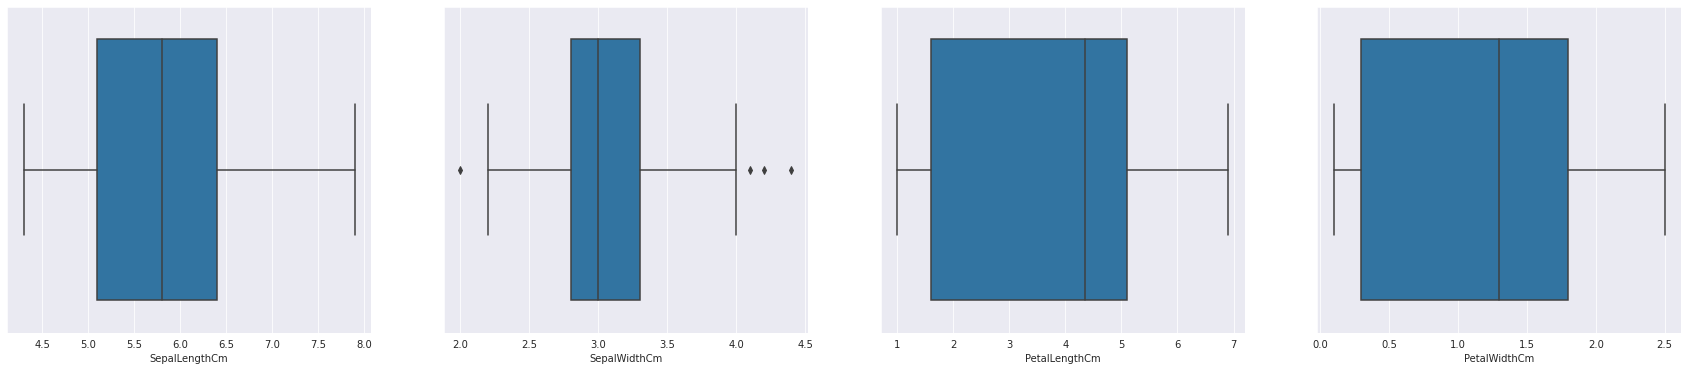

In [ ]:
plt.figure(figsize=(30,6))

plt.subplot(1,4,1)
sns.boxplot(df["SepalLengthCm"])
#plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(df["SepalWidthCm"])
#plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(df["PetalLengthCm"])
#plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(df["PetalWidthCm"])
#plt.title("Petal Width\n")

plt.show()

In [ ]:
cols=df.iloc[:,1:5]
cols.corr(method='pearson')



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


INFERENCE: The dataset does not contain missing values and no outliers as well.

**STEP 3: DATA VISUALIZATION**

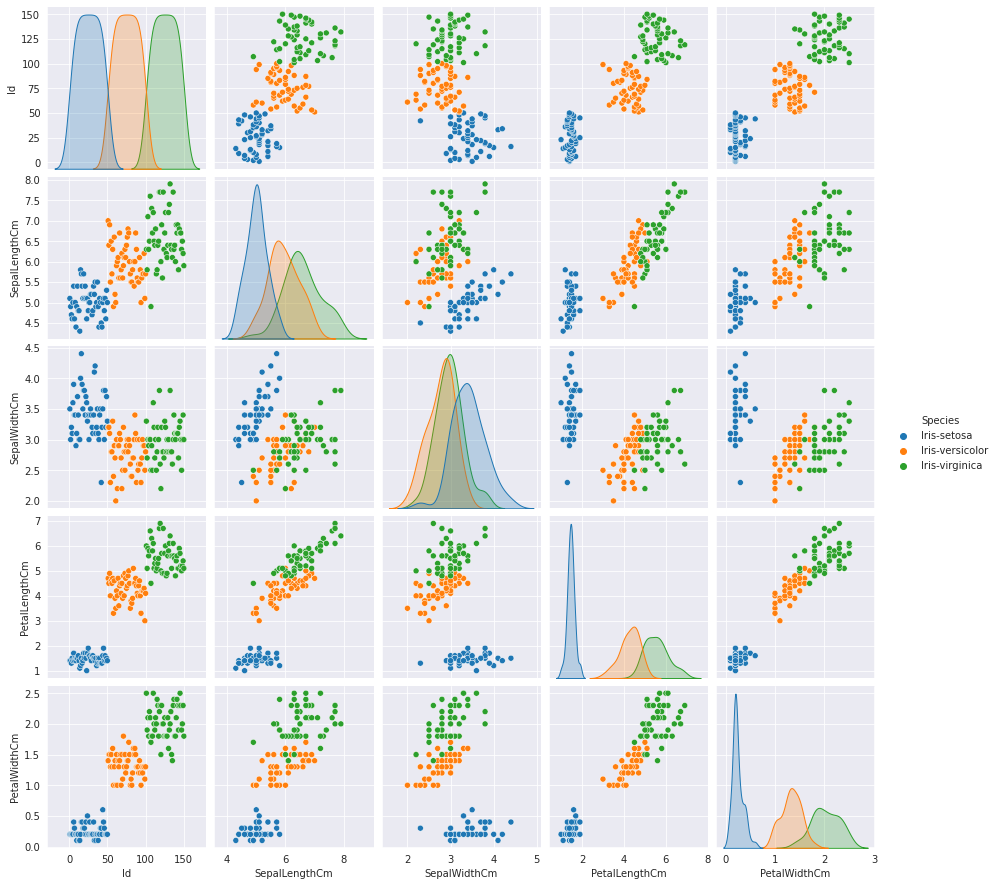

In [ ]:
sns.pairplot(df,hue='Species')

**STEP 4: FINDING THE OPTIMAL K VALUE**
1. Elbow method
2. Silhoutte analysis

In [ ]:
df_new = df.drop('Species',1)
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
wcss = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 50, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

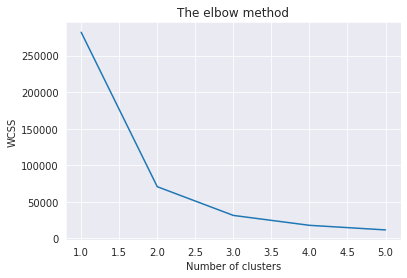

In [ ]:
plt.plot(range(1, 6), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#silhoutte analysis
range_n_clusters = [3, 4,5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=3, the silhouette score is 0.5816702617893469
For n_clusters=4, the silhouette score is 0.5565212241684705
For n_clusters=5, the silhouette score is 0.5402757035296507


INFERENCE: for 3 clusters, we can find an optimal clustering of the dataset. This result matches with our visual interpretation and guves agreed upon results.

**STEP 5: BUILDING THE MODEL WITH 3 CLUSTERS**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

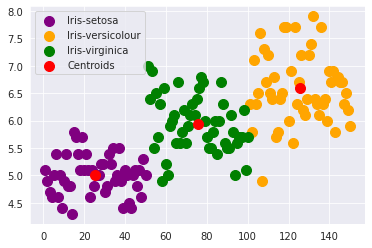

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

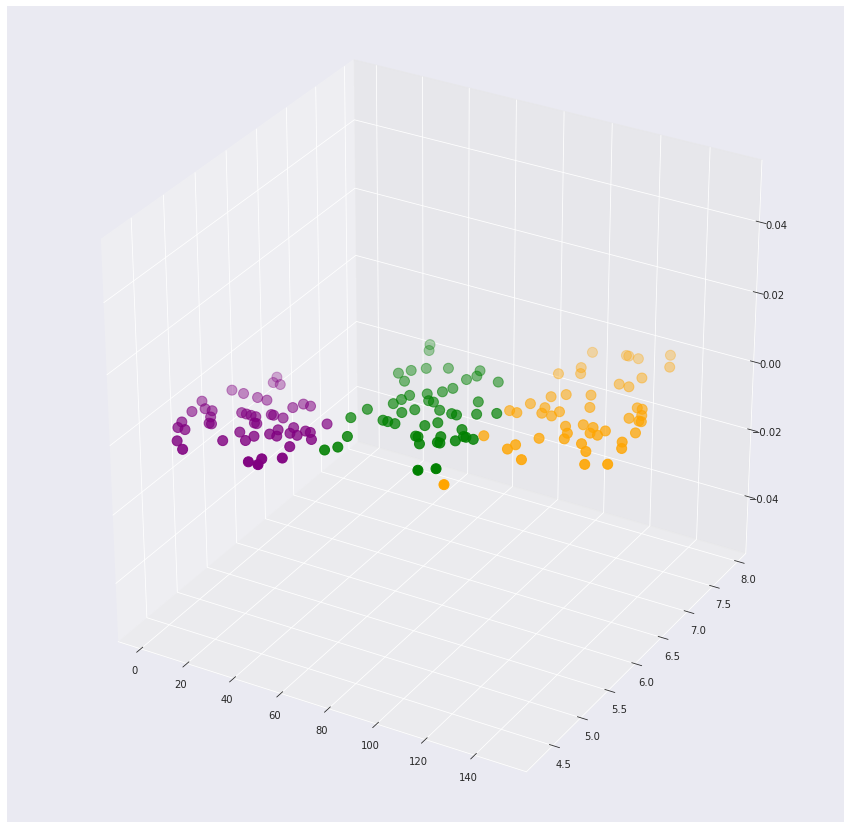

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

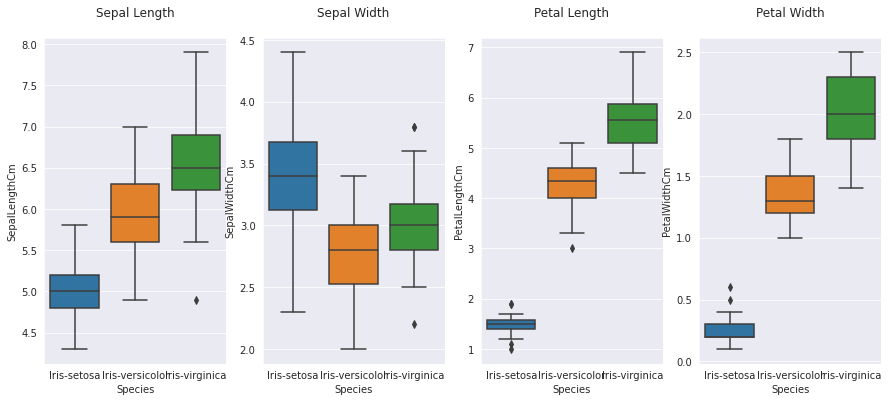

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(y = df['SepalLengthCm'], x = df['Species'])
plt.title("Sepal Length\n")

plt.subplot(1,4,2)
sns.boxplot(y = df['SepalWidthCm'], x = df['Species'])
plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot(y = df['PetalLengthCm'], x = df['Species'])
plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(y = df['PetalWidthCm'], x = df['Species'])
plt.title("Petal Width\n")

plt.show()


INFERENCE: Representation of 3 clusters.

**CONCLUSION: I could successfully determine that the optimum number of clusters in iris dataset would be. I was able to build an unsupervised model from the dataset.**

**Our analysis is complete.**